In [2]:
import networkx as nx
import osmnx as ox
import pandas as pd

ox.__version__

'2.0.1'

In [5]:

stats = ox.stats.basic_stats(ox.graph.graph_from_place("Tver, Russia"))
stats["circuity_avg"]

1.0653363800263091

In [8]:
place = "Tver, Russia"
gdf = ox.geocoder.geocode_to_gdf(place)
area = ox.projection.project_gdf(gdf).union_all().area
G = ox.graph.graph_from_place(place, network_type="drive")

In [9]:
stats = ox.stats.basic_stats(G, area=area)
pd.Series(stats)

n                                                                            3020
m                                                                            7747
k_avg                                                                    5.130464
edge_length_total                                                  1259393.619114
edge_length_avg                                                        162.565331
streets_per_node_avg                                                     3.016887
streets_per_node_counts         {0: 0, 1: 393, 2: 20, 3: 1763, 4: 832, 5: 11, ...
streets_per_node_proportions    {0: 0.0, 1: 0.13013245033112583, 2: 0.00662251...
intersection_count                                                           2627
street_length_total                                                 709181.416785
street_segment_count                                                         4526
street_length_avg                                                      156.690547
circuity_avg    

In [10]:
stats = ox.stats.basic_stats(G, area=area)
for k, count in stats["streets_per_node_counts"].items():
    stats[f"{k}way_int_count"] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats[f"{k}way_int_prop"] = proportion

In [11]:
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]


In [12]:
pd.DataFrame(pd.Series(stats, name="value")).round(3)

,value
n,3020.000
m,7747.000
k_avg,5.130
edge_length_total,1259393.619
edge_length_avg,162.565
streets_per_node_avg,3.017
intersection_count,2627.000
street_length_total,709181.417
street_segment_count,4526.000
street_length_avg,156.691


In [13]:
bc = nx.betweenness_centrality(ox.convert.to_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(411267000, 0.19463587252020614)

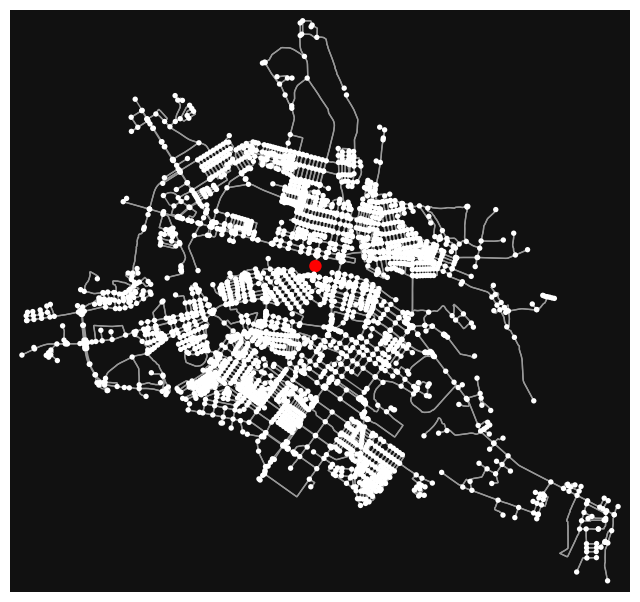

In [14]:
nc = ["r" if node == max_node else "w" for node in G.nodes]
ns = [80 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

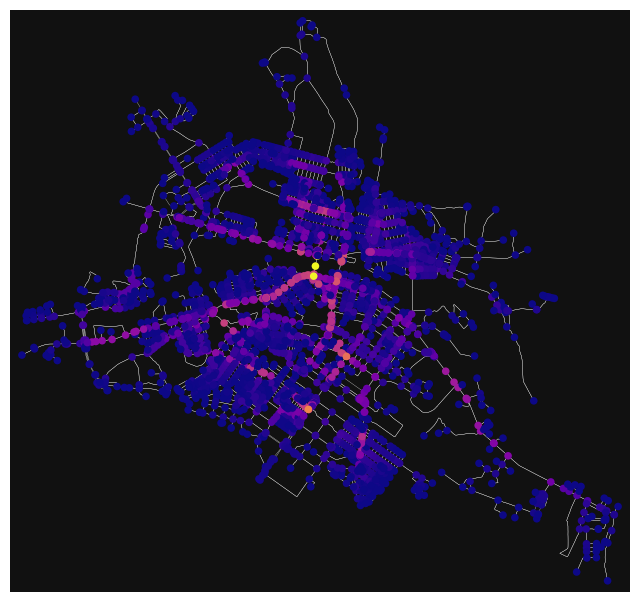

In [15]:
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot.plot_graph(
    G,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)